<a href="https://colab.research.google.com/github/ordas21/CompScraper/blob/main/RentCast_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
col_list=['abbreviation','unit-type','comp-address','monthly-rent','price-sqft','days-ago','similarity','dist','beds','baths','sqft','type']
df = pd.read_csv(io.BytesIO(uploaded["cleaned(rentcast).csv"]), usecols=col_list)

Saving cleaned(rentcast).csv to cleaned(rentcast).csv


In [ ]:
df.head()

,abbreviation,unit-type,comp-address,similarity,beds,baths,sqft,type,monthly-rent,days-ago,price-sqft,dist
0,as185,27201-A1,"6829 E Martin Luther King Jr Blvd, Unit 642\nA...",80.00%,1,1.0,701,Apartment,1655,118,2.362,1.31
1,as185,27201-A1,"7501 Shelton Ave\nAustin, TX 78725",78.10%,1,1.0,NaN,Single Family,1200,80,NaN,2.06
2,as185,27201-A1,"5232 Hutchinson Dr\nAustin, TX 78723",77.50%,2,1.0,808,Single Family,1800,118,2.232,2.25
3,as185,27201-A1,"6000 Ed Bluestein Blvd, Unit 201\nAustin, TX 7...",77.00%,1,1.0,695,Apartment,1490,1,2.142,2.28
4,as185,27201-A1,"6206 Loyola Ln, Unit 1501\nAustin, TX 78724",75.50%,1,1.0,786,Apartment,948,118,1.212,1.97


In [ ]:
print(df.shape)

(5276, 12)


In [ ]:
df.describe()

,baths,monthly-rent,days-ago,price-sqft,dist
count,5084.000000,5276.000000,5276.000000,4293.000000,5276.000000
mean,1.406471,1402.807619,81.623199,1.651641,0.602381
std,0.498330,484.049743,73.900395,0.547380,0.465520
min,1.000000,331.000000,1.000000,0.042000,0.000000
25%,1.000000,1049.000000,2.000000,1.262000,0.170000
50%,1.000000,1324.000000,74.000000,1.542000,0.520000
75%,2.000000,1656.000000,120.000000,1.972000,0.980000
max,3.500000,5000.000000,248.000000,5.142000,2.330000


In [ ]:
days = df['days-ago']
older_than_3weeks = days[days > 60].count()
str(int(older_than_3weeks/5276*100))+'% of the listings are older than 4 weeks'

'52% of the listings are older than 4 weeks'

In [ ]:
str(df['unit-type'].nunique())+" unit types with more than 5 units"

'264 unit types with more than 5 units'

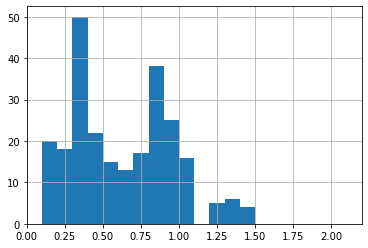

In [ ]:
distance = df[['unit-type','dist']]
distance_by_unit_type= distance.groupby(['unit-type']).mean()
mean_distance= distance_by_unit_type['dist']
mean_distance.hist(bins=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1])